# Featuring

In [58]:
import pandas as pd 
import numpy as np

In [59]:
# import dataset yang telah dipreprocessing
df = pd.read_csv("Text_Preprocessing.csv", usecols=["Kategori", "Komentar_tokens_stemmed"])
df.columns = ["kategori", "komentar"]

df.head()

,kategori,komentar
0,Non-bullying,"['kakak', 'tidur', 'sudah', 'pagi', 'tidak bol..."
1,Non-bullying,"['makan', 'nasi', 'padang', 'saja', 'badan']"
2,Bullying,"['suka', 'cukur', 'jembut', 'manggung']"
3,Non-bullying,"['hai', 'kakak', 'isyana', 'ngefans', 'sekali'..."
4,Non-bullying,"['manusia', 'bidadari', 'sih', 'heran', 'deh',..."


# Scikit-Learn TF-IDF Formula
Formula untuk menghitung IDF pada Scikit-Learn berbeda, 

* jika parameter smooth_idf=True pada TfidfVectorizer
>idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1

* sebaliknya jika smooth_idf=False
>idf(t) = log [ n / df(t) ] + 1

# Menggunakan L2 Normalization
Sparse matrix dengan size (n_samples, n_feature) pada Scikit-Learn akan di normalisasi ke normalizer L2 by default, dengan formula,
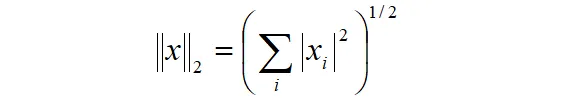

Kita dapat memilih untuk tidak menggunakan normalizer pada TfidfVectorizer dengan menambahkan parameter norm=None .

# Menghitung TF-IDF bigram dan trigram
Untuk menghitung TF-IDF bigram dan trigram menggunakan Scikit-Learn, kita dapat menambahkan argument ngram_range=(min_n, max_n). 

min_n dan max_n merupakan batasan minimum dan maksimum ngram yang akan digunakan pada fungsi TfidfVectorizer() maupun CountVectorizer() .

* ngram_range=(1,1) artinya hanya hitung TFIDF unigram,

* ngram_range=(1,2) artinya hitung TFIDF unigram dan bigram,

* ngram_range=(2,2) artinya hanya hitung TFIDF bigram,

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus

# Feature Engineering 
print ("------- TF-IDF on data -------")
vect = CountVectorizer(ngram_range=(1,1))
TF_vec = vect.fit_transform(df['komentar'])

norm_TF_vec = normalize(TF_vec, axis=1)

tf_idf = TfidfVectorizer(binary=True, ngram_range=(1,1))
tfs = tf_idf.fit_transform(df['komentar'])
IDF_vec = tf_idf.idf_

tfidf_mat = TF_vec.multiply(IDF_vec).toarray()


print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on data -------
TF-IDF  <class 'numpy.ndarray'> (650, 1319)


In [61]:
# Visualisasi tabel
a = tf_idf.get_feature_names()
tf_tb = norm_TF_vec.multiply(IDF_vec).toarray()
dfbtf =pd.DataFrame(data=tfidf_mat,columns=[a])
dfbtf


,aamiin,abai,abal,abu,activity,ada,adab,adam,adaptasi,adi,...,yemuke,yesus,you,younger,youtube,youtuber,yuhu,yutuber,ziu,zo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#menampilkan hasil term dengan TF-IDF terbesar
terms = tf_idf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
551,kamu,393.868678
47,anjing,270.497161
1164,sudah,263.315155
1053,saja,260.071868
537,kakak,258.401152
...,...,...
672,laura,6.785362
673,laut,6.785362
674,lawan,6.785362
676,lebay,6.785362


# Modeling

In [63]:
# membagi data ke training and testing sets
X = tfidf_mat
y = df['kategori']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)

print("Data distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))

Data distribution:
- Train: 520 
- Validation: 65 
- Test: 65


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train a Logistic Regression Model
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [65]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['Bullying', 'Non-bullying', 'Bullying', 'Bullying', 'Non-bullying',
       'Bullying', 'Non-bullying', 'Bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Non-bullying', 'Bullying', 'Non-bullying',
       'Bullying', 'Non-bullying', 'Bullying', 'Bullying', 'Bullying',
       'Bullying', 'Bullying', 'Non-bullying', 'Bullying', 'Bullying',
       'Bullying', 'Non-bullying', 'Non-bullying', 'Non-bullying',
       'Bullying', 'Bullying', 'Bullying', 'Non-bullying', 'Non-bullying',
       'Non-bullying', 'Non-bullying', 'Bullying', 'Non-bullying',
       'Bullying', 'Bullying', 'Bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Non-bullying',
       'Bullying', 'Non-bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Non-bullying',
       'Bullying', 'Non-bullying', 'Non-bullying', 'Bullying', 'Bullying',
       'Bullying', 'Bullying', 'Bullying', 'Non-bullying', 'Non-bullying',
      

In [66]:
# Check Accuracy
acc = accuracy_score(y_test, y_pred)
print (f'Accuracy - :', acc)

Accuracy - : 0.8769230769230769


In [67]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Bullying       0.88      0.88      0.88        32
Non-bullying       0.88      0.88      0.88        33

    accuracy                           0.88        65
   macro avg       0.88      0.88      0.88        65
weighted avg       0.88      0.88      0.88        65



# Hyperparameter Tuning
* digunakan untuk memperbaiki performa model machine learning
* dilakukan dengan mencoba berbagai nilai hyperparameter dari suatu model machine learning

## More on Hyperparameters
* Solver: https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
* L1 and L2 Regularisation: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
* Slearn Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [68]:
from sklearn.model_selection import GridSearchCV

logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1'], # other option : 'l2', 'elasticnet', 'none'
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [5000] # other option : 100, 1000,2500
    }
]

cv = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [69]:
best = cv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 269 out of 300 | elapsed:   25.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   37.8s finished


In [70]:
cv.best_estimator_

LogisticRegression(C=3792.690190732246, max_iter=5000, penalty='l1',
                   solver='saga')

In [71]:
# Check Accuracy
best = cv.score(X,y)
print (f'Accuracy - :', best)

Accuracy - : 0.9738461538461538


In [77]:
# save model
import pickle
  
  
# Save the model as a pickle in a file
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(cv, file)

In [78]:
#Loading model to compare the results
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [79]:
prediction = loaded_model.predict(X_test)
print("Prediction:", prediction)

Prediction: ['Bullying' 'Non-bullying' 'Bullying' 'Bullying' 'Non-bullying' 'Bullying'
 'Non-bullying' 'Bullying' 'Non-bullying' 'Bullying' 'Non-bullying'
 'Non-bullying' 'Bullying' 'Non-bullying' 'Bullying' 'Non-bullying'
 'Bullying' 'Bullying' 'Bullying' 'Bullying' 'Bullying' 'Non-bullying'
 'Bullying' 'Bullying' 'Bullying' 'Non-bullying' 'Non-bullying'
 'Non-bullying' 'Bullying' 'Bullying' 'Bullying' 'Non-bullying'
 'Non-bullying' 'Non-bullying' 'Non-bullying' 'Bullying' 'Non-bullying'
 'Bullying' 'Bullying' 'Bullying' 'Bullying' 'Non-bullying' 'Non-bullying'
 'Non-bullying' 'Non-bullying' 'Non-bullying' 'Bullying' 'Non-bullying'
 'Bullying' 'Non-bullying' 'Non-bullying' 'Non-bullying' 'Non-bullying'
 'Non-bullying' 'Bullying' 'Non-bullying' 'Non-bullying' 'Bullying'
 'Bullying' 'Bullying' 'Bullying' 'Bullying' 'Non-bullying' 'Non-bullying'
 'Non-bullying']
